<a href="https://colab.research.google.com/github/vanesalinas/HENRY_PIDA_Telecomunicaciones/blob/main/EDA_Telecomunicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Estructura del dataframe**

---

> Se cargan los dataframes generados en el proceso de ETL para realizar un vistazo rapido de los datos que contienen y su estructura.

In [113]:
df = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df.csv')
df_totales = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df_totales.csv')
df_localidades = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df_localidades.csv')

In [114]:
# Ajusta la configuración para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [115]:
df.head()

Año  Trimestre        Provincia  0-10 Mbps  +10-25 Mbps  +25-50 Mbps  \
0  2024          1     Buenos Aires  502922.00    284608.00   1296268.00   
1  2024          1  Capital Federal   87102.00     37803.00    125198.00   
2  2024          1        Catamarca    6543.00      5165.00     36072.00   
3  2024          1            Chaco   23852.00      8968.00     35430.00   
4  2024          1           Chubut   76907.00     36631.00     39046.00   

   +50-100 Mbps  +100-250 Mbps  +250-500 Mbps  +500-1000 Mbps  ...  \
0     959048.00      495509.00     1210949.00       170106.00  ...   
1     394021.00      151870.00      639913.00        68804.00  ...   
2      17716.00          42.00        8471.00          854.00  ...   
3      55941.00        1925.00       24782.00          829.00  ...   
4       1257.00           1.00         161.00           33.00  ...   

   Otras_Velocidades  Mbps (Media de bajada)  Accesos por cada 100 hab  \
0          125147.00                  159.13                     27.80   
1               0.00                  229.94                     48.78   
2              70.00                   91.45                     17.50   
3            3816.00                  107.51                     12.48   
4           16640.00                   20.50                     26.02   

   Accesos por cada 100 hogares      ADSL  Cablemodem  Fibra óptica  Wireless  \
0                         81.10 203297.00  2790663.00    1799013.00 150290.00   
1                        119.53  70108.00  1177475.00     203756.00   4493.00   
2                         68.82   5901.00    11025.00      56542.00   1384.00   
3                         46.70  11343.00    58929.00      64463.00   8404.00   
4                         84.89  26306.00    77217.00      26356.00  30867.00   

   Otras_Tecnologias  Total_Tecnologias  
0          101294.00         5044557.00  
1           48879.00         1504711.00  
2              81.00           74933.00  
3           12404.00          155543.00  
4            9930.00          170676.00  

[5 rows x 22 columns]

In [116]:
df.shape

(552, 22)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           552 non-null    int64  
 1   Trimestre                     552 non-null    int64  
 2   Provincia                     552 non-null    object 
 3   0-10 Mbps                     552 non-null    float64
 4   +10-25 Mbps                   552 non-null    float64
 5   +25-50 Mbps                   552 non-null    float64
 6   +50-100 Mbps                  552 non-null    float64
 7   +100-250 Mbps                 552 non-null    float64
 8   +250-500 Mbps                 552 non-null    float64
 9   +500-1000 Mbps                552 non-null    float64
 10  +1000-5000 Mbps               552 non-null    float64
 11  +5000 Mbps                    552 non-null    float64
 12  Otras_Velocidades             552 non-null    float64
 13  Mbps 

In [118]:
df.describe()

Año  Trimestre  0-10 Mbps  +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  \
count  552.00     552.00     552.00       552.00       552.00        552.00   
mean  2020.70       2.57  136493.03     58540.78     95611.63      66545.46   
std      1.95       1.17  255476.95    128752.62    250488.17     203733.60   
min   2017.00       1.00    3327.00         0.00         0.00          0.00   
25%   2019.00       1.00   37120.00      8926.25      2333.00        421.00   
50%   2021.00       3.00   64117.00     24308.50     22966.00       7068.00   
75%   2022.00       4.00  102909.75     38320.75     44741.00      30688.00   
max   2024.00       4.00 1874750.00   1088846.00   1776123.00    1501057.00   

       +100-250 Mbps  +250-500 Mbps  +500-1000 Mbps  +1000-5000 Mbps  ...  \
count         552.00         552.00          552.00           552.00  ...   
mean         8948.93       34623.47         2875.22            10.34  ...   
std         52452.77      144090.00        16374.94           104.43  ...   
min             0.00           0.00            0.00             0.00  ...   
25%             0.00           0.00            0.00             0.00  ...   
50%             2.00         553.50            0.00             0.00  ...   
75%           335.00        8443.25          120.00             0.00  ...   
max        511235.00     1237732.00       170106.00          1104.00  ...   

       Otras_Velocidades  Mbps (Media de bajada)  Accesos por cada 100 hab  \
count             552.00                  552.00                    552.00   
mean            10073.49                   36.79                     17.91   
std             18650.33                   36.70                      8.78   
min                 0.00                    3.98                      3.03   
25%               726.75                   11.11                     11.67   
50%              4508.50                   23.90                     15.02   
75%             13300.75                   45.71                     22.86   
max            125147.00                  234.44                     51.62   

       Accesos por cada 100 hogares       ADSL  Cablemodem  Fibra óptica  \
count                        552.00     552.00      552.00        552.00   
mean                          60.36   85666.03   222536.94      77094.76   
std                           21.64  164521.41   522300.03     228599.57   
min                           10.59    2827.00      263.00          0.00   
25%                           43.51   16905.25    23891.00       1861.50   
50%                           56.87   36279.00    55515.00      16145.00   
75%                           76.14   69607.75    83954.75      44748.00   
max                          122.90 1452061.00  2797700.00    1799013.00   

       Wireless  Otras_Tecnologias  Total_Tecnologias  
count    552.00             552.00             552.00  
mean   18140.04            8614.18          412051.95  
std    25294.97           13454.40          867327.77  
min        0.00              29.00           14904.00  
25%     3896.00             761.00           86204.00  
50%     8267.00            2934.00          131020.50  
75%    20751.25           10555.25          219704.00  
max   150290.00          101294.00         5044557.00  

[8 rows x 21 columns]

In [119]:
df_totales.head()

Año  Trimestre        Periodo  Accesos por cada 100 hogares  \
0  2024          1   Ene-Mar 2024                         78.89   
1  2023          4   Oct-Dic 2023                         78.56   
2  2023          3  Jul-Sept 2023                         77.84   
3  2022          4   Oct-Dic 2022                         77.21   
4  2022          3  Jul-Sept 2022                         76.64   

   Accesos por cada 100 hab     ADSL  Cablemodem  Fibra óptica  Wireless  \
0                     24.79   774475     5986957       4015101    598682   
1                     24.66   836390     6022532       3908183    585760   
2                     24.41   897895     6018832       3708718    581436   
3                     24.15  1315373     6037457       3060575    572969   
4                     23.95  1395277     6031970       2871541    557110   

    Otros  ...  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  257941  ...           28801                    69355   
1  194796  ...           29708                    71742   
2  200027  ...           30274                    80609   
3  221740  ...           31981                    85668   
4  235230  ...           33013                    96727   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                1075272                 1109421                   765015   
4                1161370                 1151906                   823505   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  Otras Velocidades  \
0                   353896         8363694             328173   
1                   350290         8224736             295592   
2                   350918         8003269             277421   
3                   335573         7410902             394282   
4                   479822         6995750             349035   

   Total conexiones segun velocidad  Ingresos (miles de pesos)  
0                          11633156               280419124.08  
1                          11547661               167376014.80  
2                          11406908               133106593.41  
3                          11208114                72443482.99  
4                          11091128                64086784.33  

[5 rows x 22 columns]

In [120]:
df_totales.shape

(39, 22)

In [121]:
df_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               39 non-null     int64  
 1   Trimestre                         39 non-null     int64  
 2   Periodo                           39 non-null     object 
 3   Accesos por cada 100 hogares      39 non-null     float64
 4   Accesos por cada 100 hab          39 non-null     float64
 5   ADSL                              39 non-null     int64  
 6   Cablemodem                        39 non-null     int64  
 7   Fibra óptica                      39 non-null     int64  
 8   Wireless                          39 non-null     int64  
 9   Otros                             39 non-null     int64  
 10  Total                             39 non-null     int64  
 11  Mbps (Media de bajada)            39 non-null     float64
 12  Hasta 512 

In [122]:
df_totales.describe()

Año  Trimestre  Accesos por cada 100 hogares  \
count   39.00      39.00                         39.00   
mean  2018.41       2.51                         62.11   
std      2.90       1.14                          9.46   
min   2014.00       1.00                         49.55   
25%   2016.00       1.50                         53.54   
50%   2018.00       3.00                         61.42   
75%   2021.00       3.50                         68.59   
max   2024.00       4.00                         78.89   

       Accesos por cada 100 hab       ADSL  Cablemodem  Fibra óptica  \
count                     39.00      39.00       39.00         39.00   
mean                      19.21 2826641.67  4316841.46    1039994.18   
std                        3.10 1019612.53  1296967.95    1175033.34   
min                       15.05  774475.00  2407330.00     139187.00   
25%                       16.44 2096899.00  3080063.50     169043.00   
50%                       18.97 3329027.00  4313831.00     388013.00   
75%                       21.34 3718779.00  5533256.50    1417611.00   
max                       24.79 3803024.00  6073426.00    4015101.00   

       Wireless     Otros       Total  ...  Hasta 512 kbps  \
count     39.00     39.00       39.00  ...           39.00   
mean  282785.85 154733.13  8620996.28  ...        48034.92   
std   194681.59  84504.97  1641179.73  ...        50584.33   
min    70749.00  54300.00  6398398.00  ...         5675.00   
25%    85244.50  68047.00  7168514.50  ...        29254.50   
50%   264299.00 166389.00  8473655.00  ...        37430.00   
75%   455758.00 247918.50  9755528.00  ...        41111.00   
max   598682.00 265328.00 11633156.00  ...       241713.00   

       Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
count                    39.00                  39.00                   39.00   
mean                 226342.69             3348770.72               908981.87   
std                  195379.84             1473724.25               236297.34   
min                   28521.00              866152.00               289182.00   
25%                   70548.50             2571853.00               828205.50   
50%                  201196.00             3337982.00               978108.00   
75%                  339317.00             4880219.50              1057958.50   
max                  687619.00             5153437.00              1245333.00   

       Entre 10 Mbps y 20 Mbps  Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  \
count                    39.00                    39.00           39.00   
mean                 897948.54                487707.79      2525985.46   
std                  466179.09                448819.73      2916172.03   
min                  101127.00                   345.00        11595.00   
25%                  682716.00                 99270.50        30021.00   
50%                  806466.00                479822.00       599579.00   
75%                 1084008.00                613933.00      4520628.00   
max                 2068087.00               1688748.00      8363694.00   

       Otras Velocidades  Total conexiones segun velocidad  \
count              39.00                             39.00   
mean           139469.95                        8583241.95   
std            124931.57                        1681530.63   
min                 0.00                        6272846.00   
25%                 0.00                        7143310.50   
50%            163269.00                        8473655.00   
75%            219180.50                        9755528.00   
max            394282.00                       11633156.00   

       Ingresos (miles de pesos)  
count                      39.00  
mean                 35145766.44  
std                  52954676.03  
min                   2984054.21  
25%                   6723341.07  
50%                  16637686.59  
75%                  37458019.00  
max                 280419124.08  

In [123]:
df_localidades.head()

Provincia     Partido          Localidad Link Indec  0-10 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100     914.00   
1  BUENOS AIRES  25 de Mayo          Del Valle    6854020     192.00   
2  BUENOS AIRES  25 de Mayo          Ernestina    6854030      75.00   
3  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040     180.00   
4  BUENOS AIRES  25 de Mayo   Lucas Monteverde    6854050       5.00   

   +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  +100-250 Mbps  +250-500 Mbps  ...  \
0      2356.00      2175.00        702.00           0.00          98.00  ...   
1         0.00         0.00          0.00           0.00           0.00  ...   
2         0.00         0.00          0.00           0.00           0.00  ...   
3         0.00         0.00          1.00           0.00           0.00  ...   
4         0.00         0.00          0.00           0.00           0.00  ...   

   Otras_Velocidades  ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  SATELITAL  \
0               0.00   755        4600        0             2        742   
1               0.00   181           0        0             0          1   
2               0.00    75           0        0             0          0   
3               0.00     0           0        0             0          0   
4               0.00     0           0        0             0          0   

   WIMAX  WIRELESS  Otras_Tecnologias  Totales_Tecnologias  
0      0       727                  0                 6826  
1      0         0                 10                  192  
2      0         0                  0                   75  
3      0       181                  0                  181  
4      0         6                  0                    6  

[5 rows x 23 columns]

In [124]:
df_localidades.shape

(2884, 23)

In [125]:
df_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            2884 non-null   object 
 1   Partido              2884 non-null   object 
 2   Localidad            2884 non-null   object 
 3   Link Indec           2884 non-null   object 
 4   0-10 Mbps            2884 non-null   float64
 5   +10-25 Mbps          2884 non-null   float64
 6   +25-50 Mbps          2884 non-null   float64
 7   +50-100 Mbps         2884 non-null   float64
 8   +100-250 Mbps        2884 non-null   float64
 9   +250-500 Mbps        2884 non-null   float64
 10  +500-1024 Mbps       2884 non-null   float64
 11  4000 Mbps            2884 non-null   float64
 12  10000 Mbps           2884 non-null   float64
 13  Otras_Velocidades    2884 non-null   float64
 14  ADSL                 2884 non-null   int64  
 15  CABLEMODEM           2884 non-null   i

In [126]:
df_localidades.describe()

0-10 Mbps  +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  +100-250 Mbps  \
count    2884.00      2884.00      2884.00       2884.00        2884.00   
mean      640.97       274.32       907.09        821.63         240.45   
std      3045.48      1614.13      6120.01       8879.02        3018.23   
min         0.00         0.00         0.00          0.00           0.00   
25%         8.00         0.00         0.00          0.00           0.00   
50%        85.00         1.00         0.00          0.00           0.00   
75%       422.25        61.00        15.00          0.00           0.00   
max     87102.00     45687.00    174690.00     394021.00      151870.00   

       +250-500 Mbps  +500-1024 Mbps  4000 Mbps  10000 Mbps  \
count        2884.00         2884.00    2884.00     2884.00   
mean          879.73           89.85       0.00        0.00   
std         12544.77         1323.61       0.02        0.17   
min             0.00            0.00       0.00        0.00   
25%             0.00            0.00       0.00        0.00   
50%             0.00            0.00       0.00        0.00   
75%             0.00            0.00       0.00        0.00   
max        639913.00        68804.00       1.00        9.00   

       Otras_Velocidades     ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  \
count            2884.00  2884.00     2884.00  2884.00       2884.00   
mean               67.97   266.33     2061.24     4.03       1379.62   
std               647.35  1667.92    23502.06    44.51       9170.77   
min                 0.00     0.00        0.00     0.00          0.00   
25%                 0.00     0.00        0.00     0.00          0.00   
50%                 0.00     0.00        0.00     0.00          1.00   
75%                 2.00    79.25       32.25     0.00        195.25   
max             24594.00 70108.00  1177475.00  2050.00     281390.00   

       SATELITAL   WIMAX  WIRELESS  Otras_Tecnologias  Totales_Tecnologias  
count    2884.00 2884.00   2884.00            2884.00              2884.00  
mean        0.97    0.76    178.90              68.00              3959.85  
std        14.02   15.59    626.35             972.86             32730.62  
min         0.00    0.00      0.00               0.00                 0.00  
25%         0.00    0.00      0.00               0.00                30.00  
50%         0.00    0.00     28.00               0.00               177.00  
75%         1.00    0.00    124.25               0.00              1115.25  
max       742.00  444.00  16630.00           46762.00           1504711.00

Esta seleccion es para responder a las siguientes preguntas que me permitiran entender y comprender el comportamiento del consumo de Internet en Argentina:
- ¿Cómo ha evolucionado la velocidad de conexión promedio en los últimos años?
- ¿Cuál es la penetración de internet en las diferentes regiones de Argentina?
- ¿Cuáles son las provincias con mayor penetración de internet?
- ¿Existen diferencias significativas en la penetración de internet entre zonas urbanas y rurales?
- ¿Qué tecnologías son las más utilizadas, en que regiones y cuáles tienen mayor potencial de crecimiento?
- ¿Cuál es la relación entre la velocidad de conexión y el ingreso por usuario?
- ¿Cómo han evolucionado los ingresos por servicios de internet a lo largo del tiempo?

# **Limpieza de datos**

---

## Registros vacios o nulos.

En la informacion de cada dataframe podemos verificar que no hay registros vacios. Si podemos visualizar que hay registros con valores 0 pero esta informacion es correcta por lo que la vamos a mantener igual.

## Valores duplicados

In [127]:
# Se revisa si existe registros duplicados
listado_df = [df, df_totales, df_localidades]

for data in listado_df:
  print(data.duplicated().sum())

0
0
0


# **Visualizacion y exploracion de los datos**

---

In [129]:
# Filtrar el DataFrame para excluir el año 2024
df_filtradoA = df[df['Año'] != 2024]
df_filtradoB = df_totales[df_totales['Año'] != 2024]

## **HISTOGRAMAS** para comprender la distribucion de las variables numericas.

In [130]:
# Lista de nombres para identificar a qué DataFrame corresponden los gráficos
nombres_df = [
    (df, 'df'),
    (df_totales, 'df_totales'),
    (df_localidades, 'df_localidades'),
]

# Configurar el número de columnas por figura
ncols = 4  # Número de columnas en cada figura

# Columnas a omitir
columnas_a_omitir = ['Año', 'Trimestre']

> Explicacion sobre la distribucion de los datos (normal, sesgada a la derecha, a la izquierda, etc.)

## **Boxplot** para identificar outliers

> Analisis outliers

## Analisis de **series temporales** para visualizar como han cambiado las variables a lo largo del tiempo.

### Evolucion en el tiempo de las cantidades de accesos segun velocidad para cada provincia

In [151]:
# Columnas de velocidad (las primeras tres columnas son Año, Trimestre y Provincia)
velocidad_cols = df.columns[3:13]
velocidad_cols

Index(['0-10 Mbps', '+10-25 Mbps', '+25-50 Mbps', '+50-100 Mbps',
       '+100-250 Mbps', '+250-500 Mbps', '+500-1000 Mbps', '+1000-5000 Mbps',
       '+5000 Mbps', 'Otras_Velocidades'],
      dtype='object')

In [152]:
# Agrupa por Año y Provincia y calcula la suma de cada rango de velocidad
df_grouped = df.groupby(['Año', 'Provincia'])[velocidad_cols].sum().reset_index()

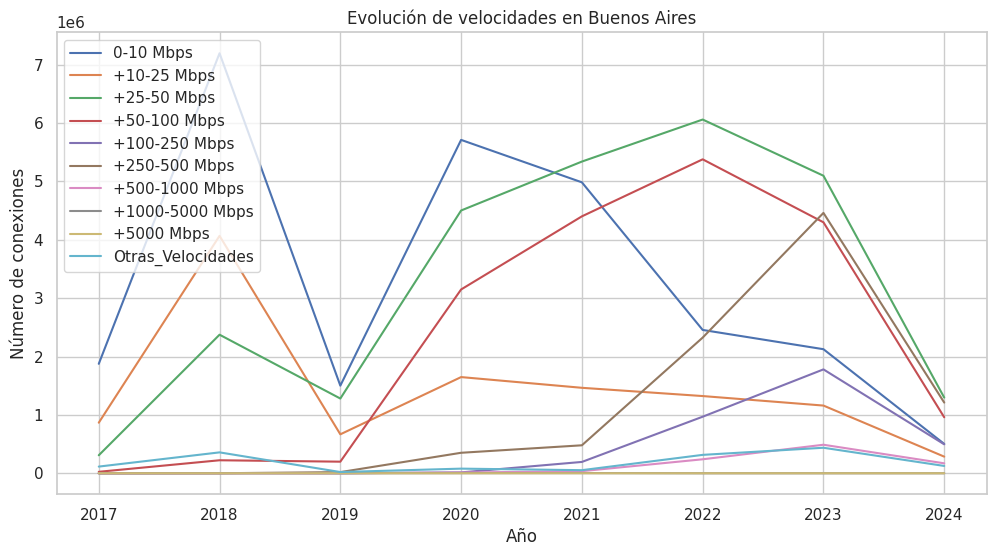

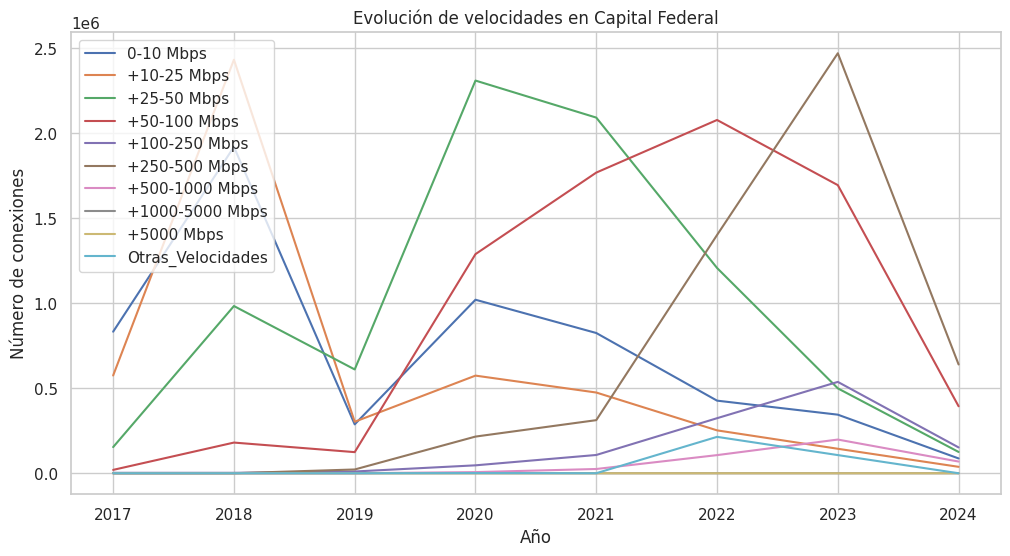

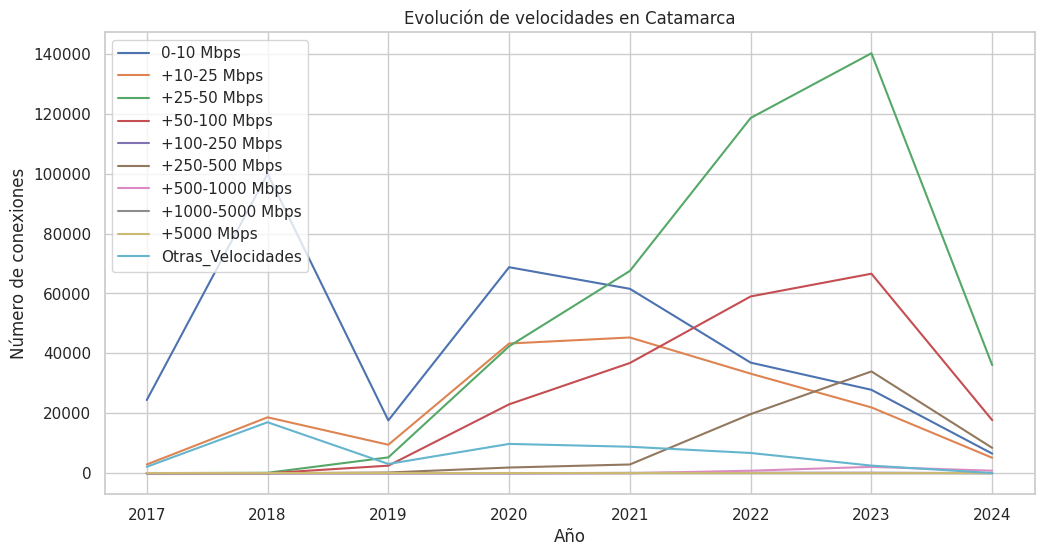

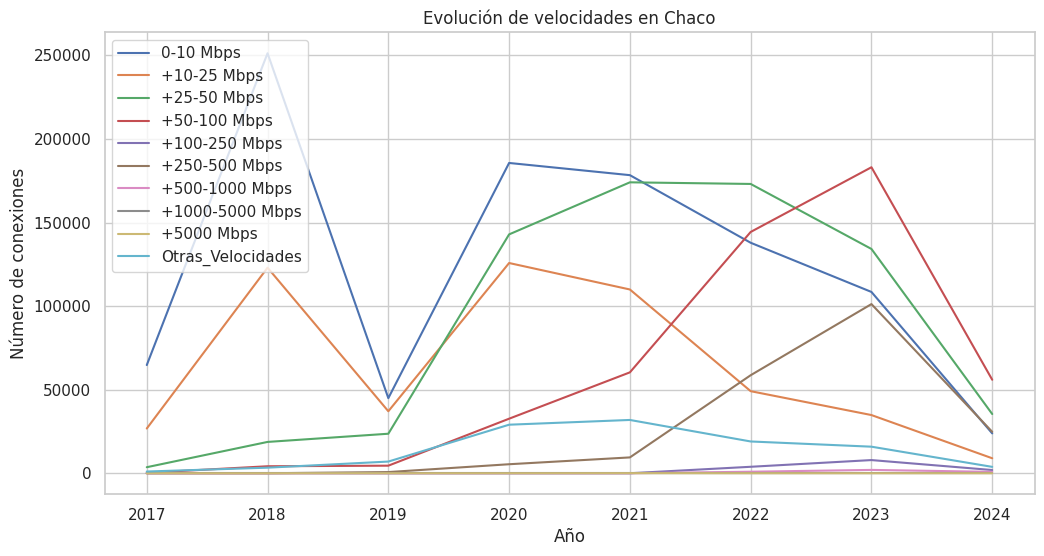

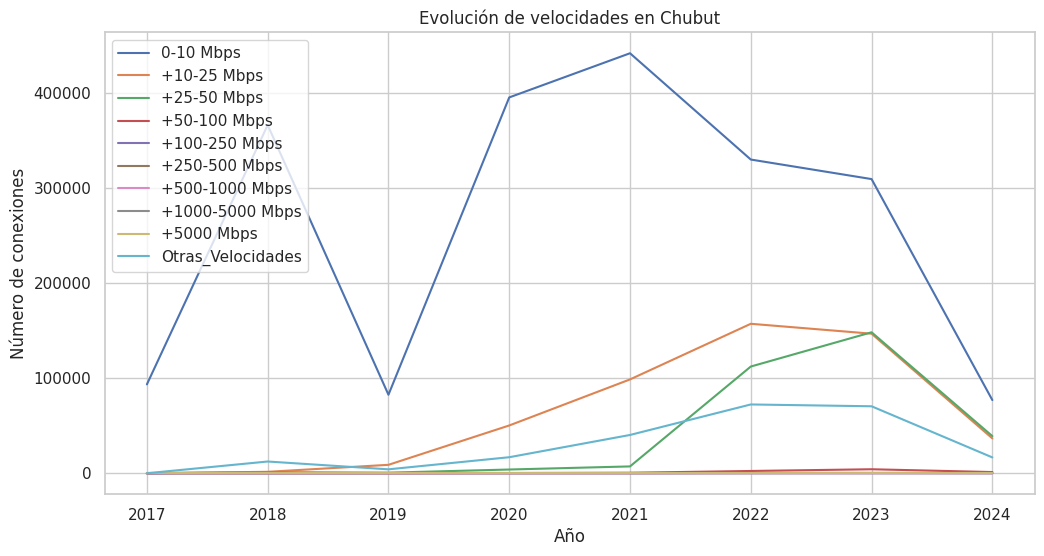

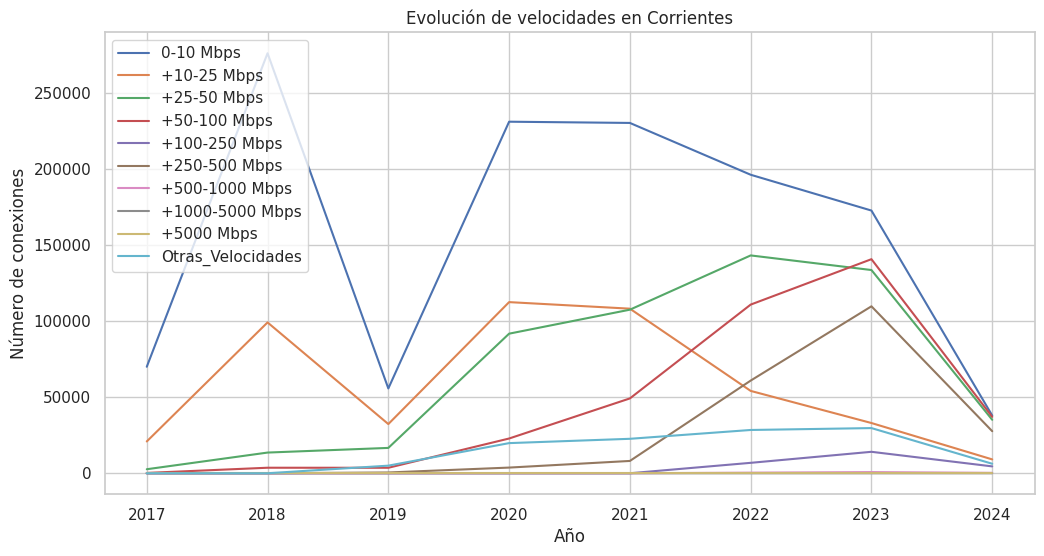

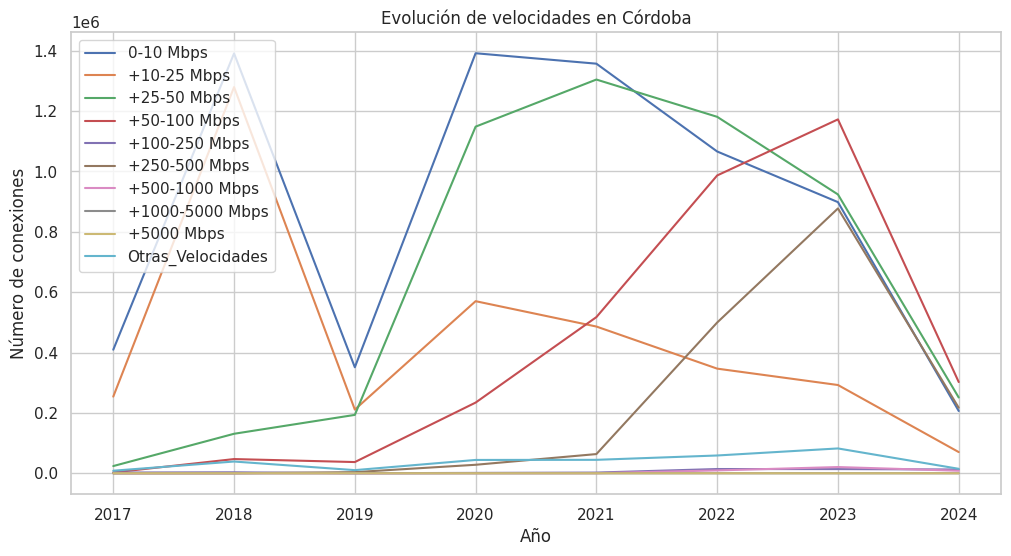

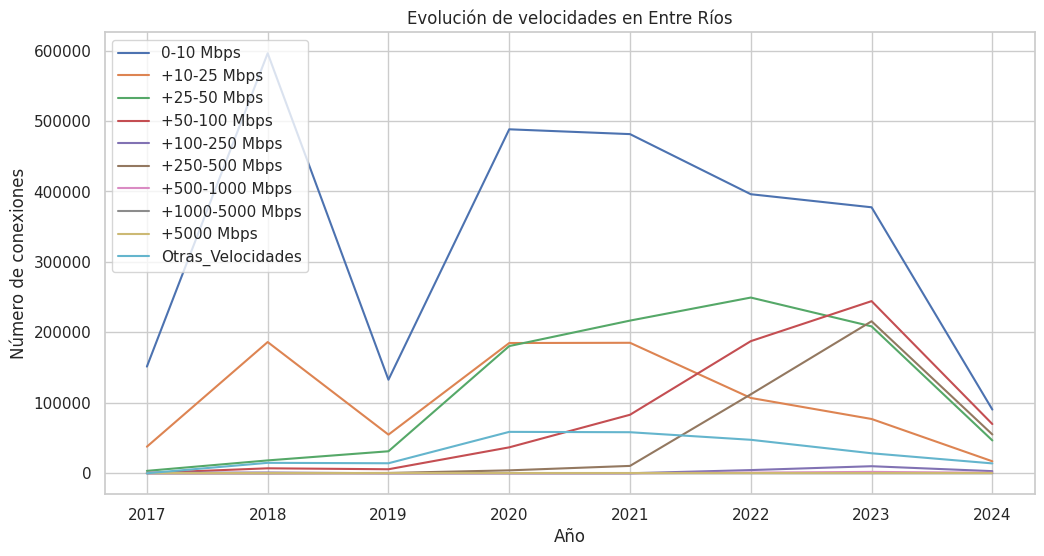

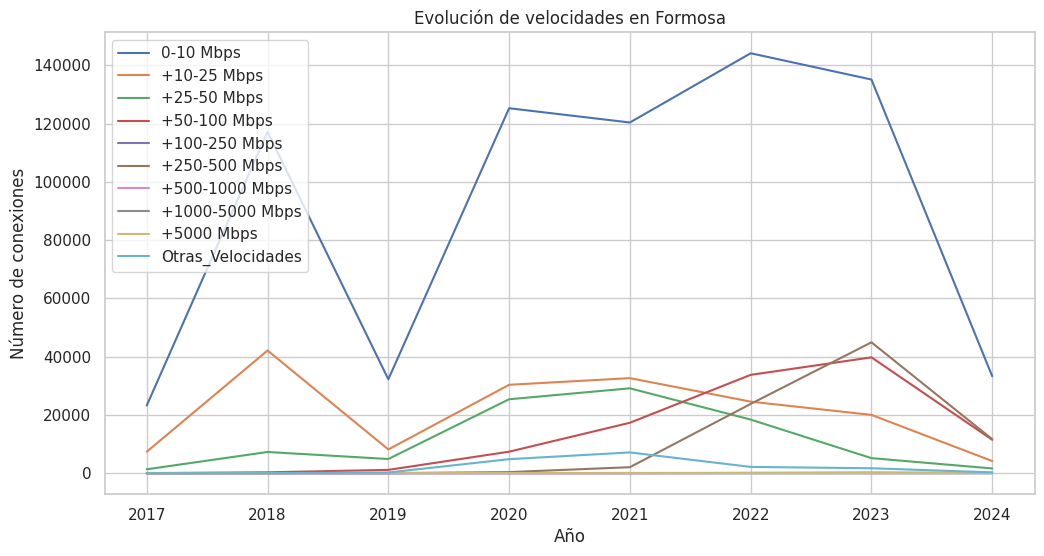

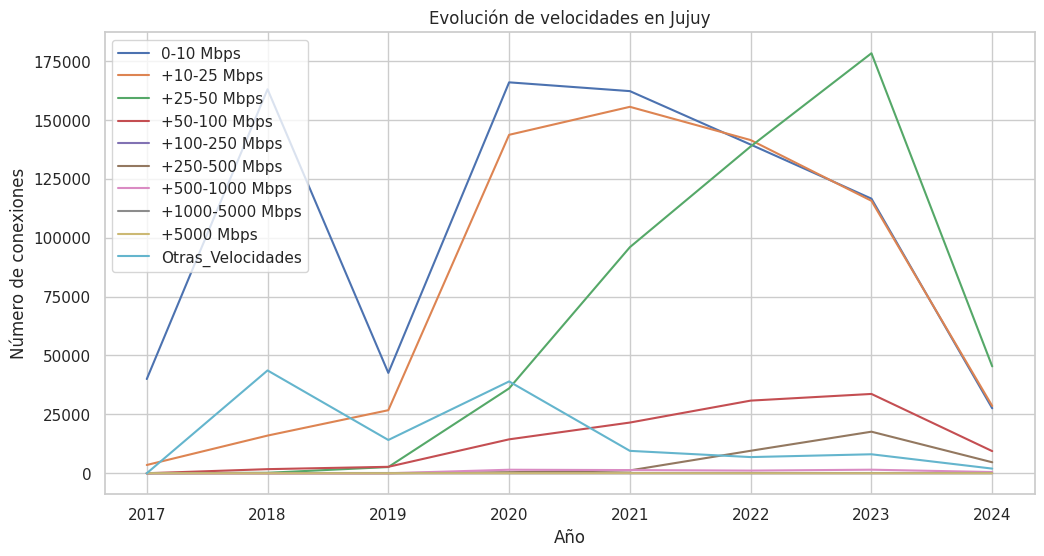

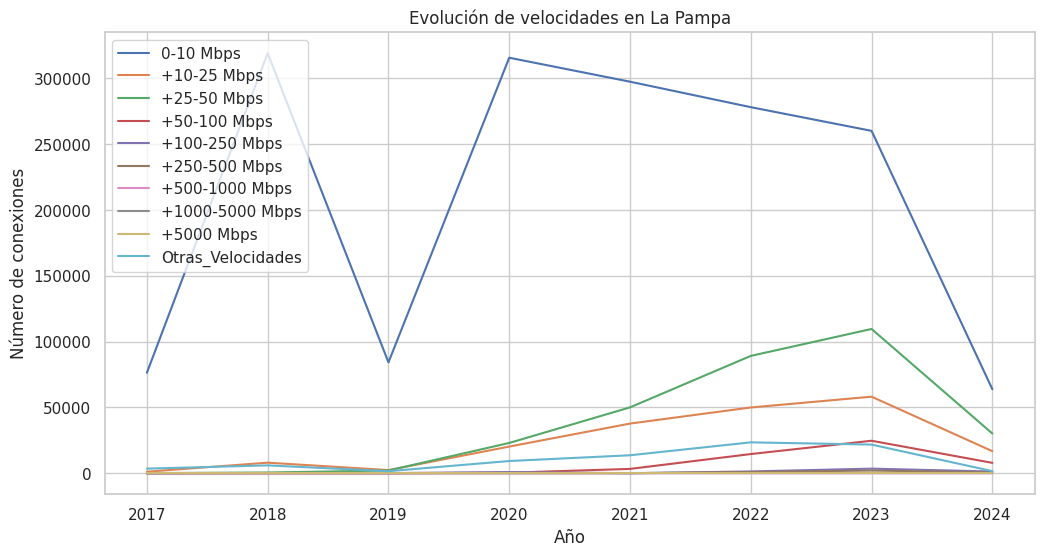

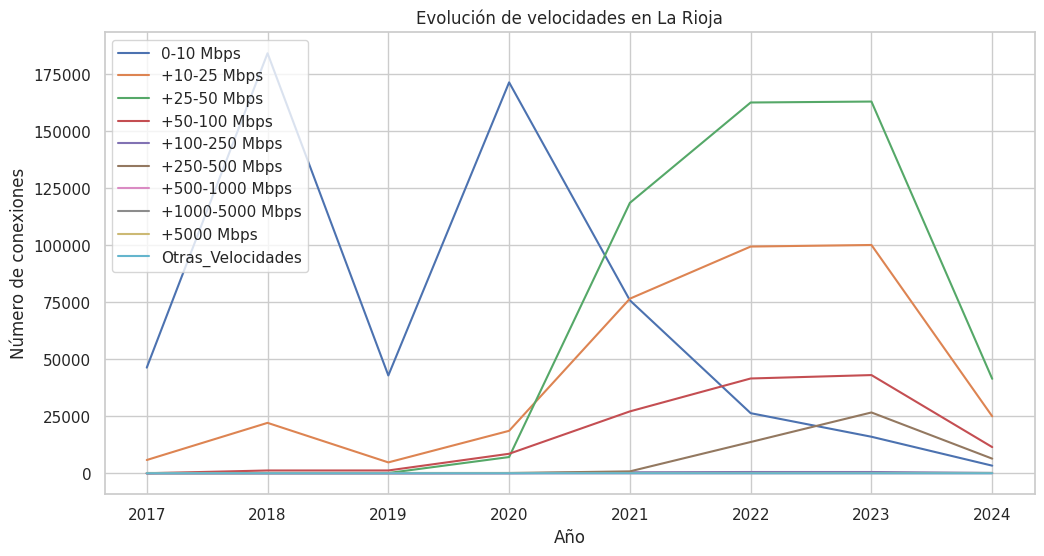

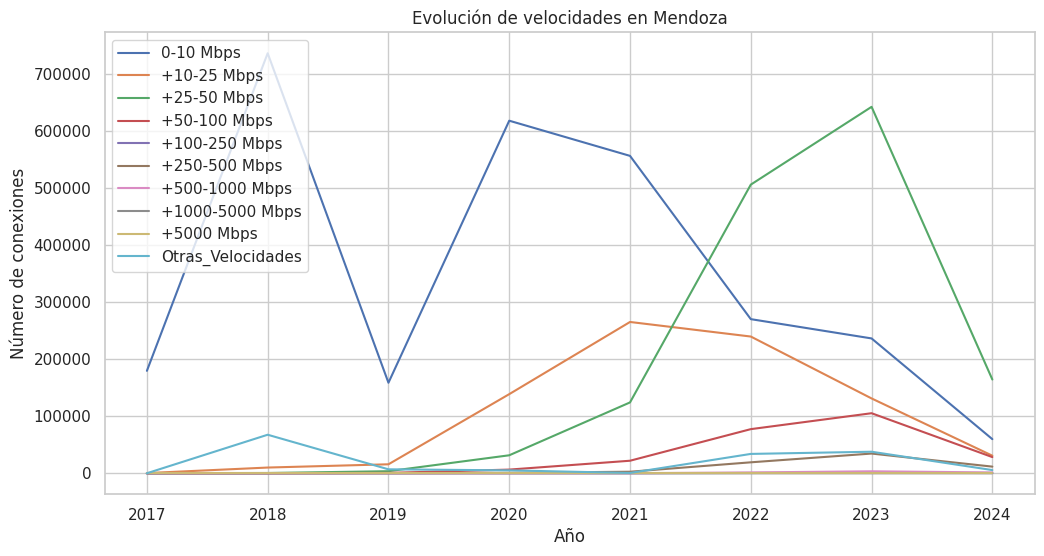

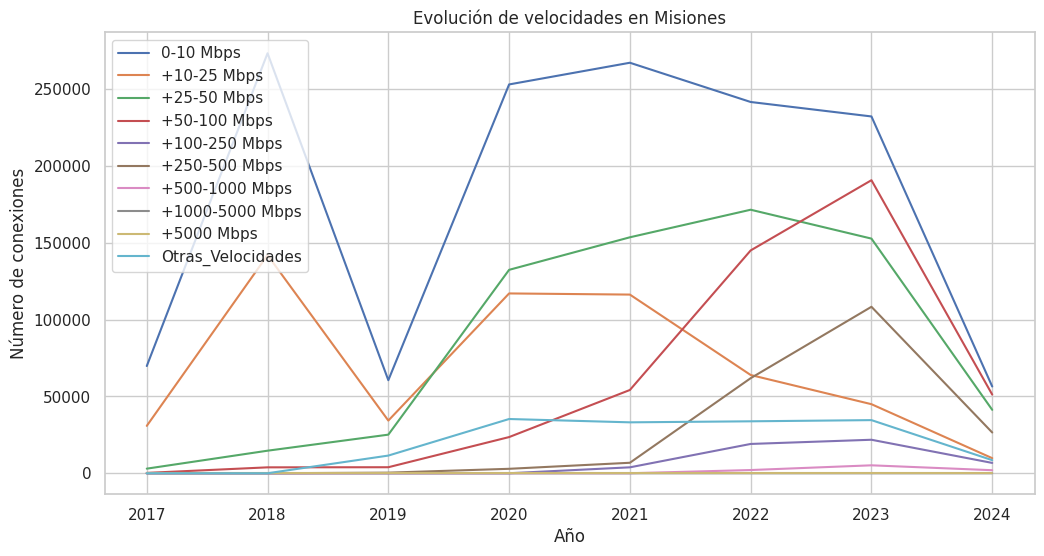

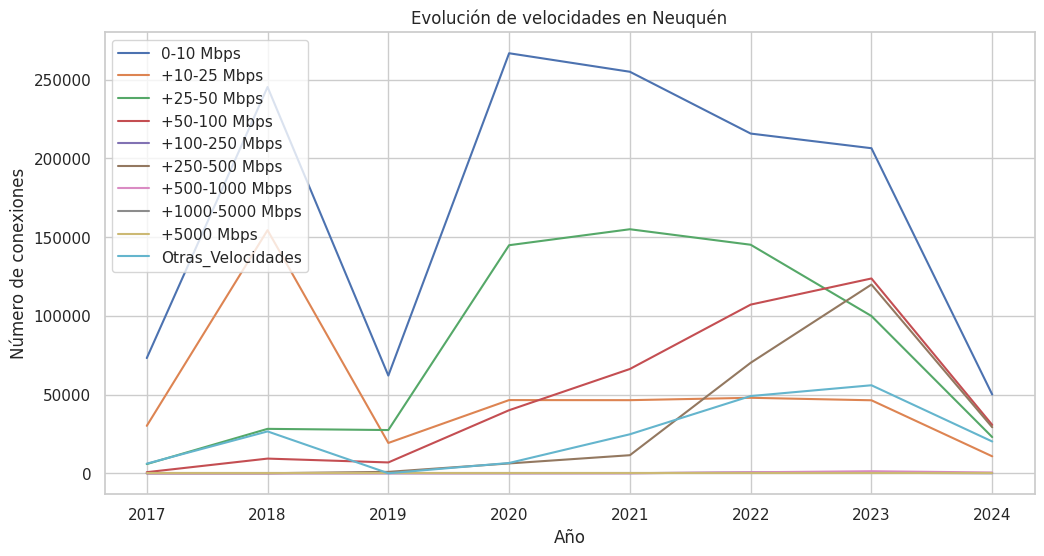

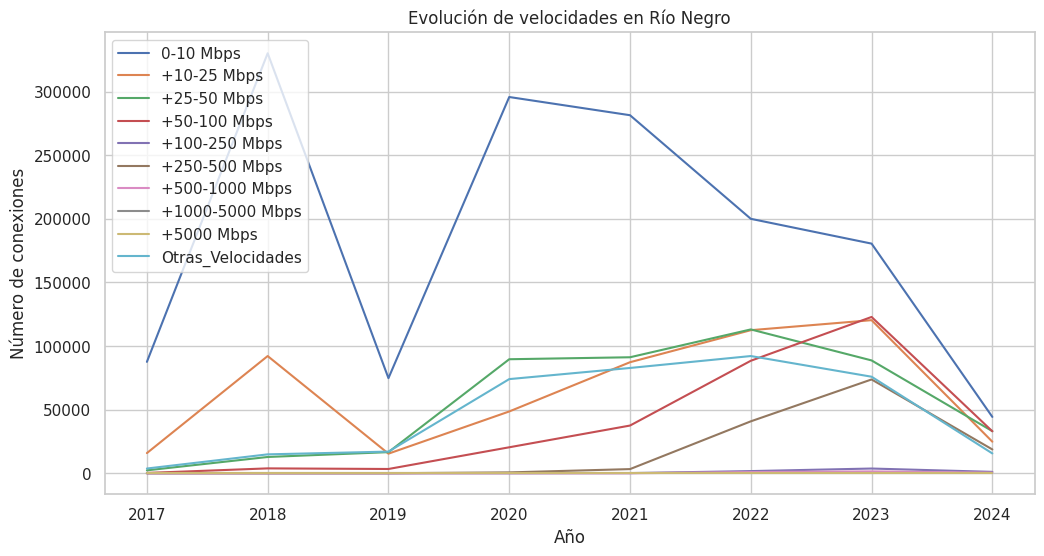

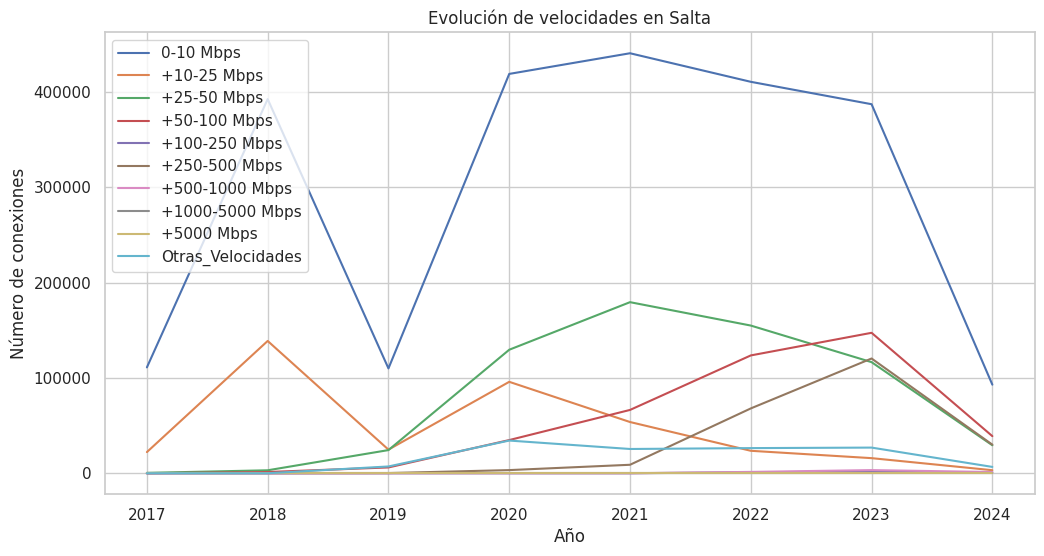

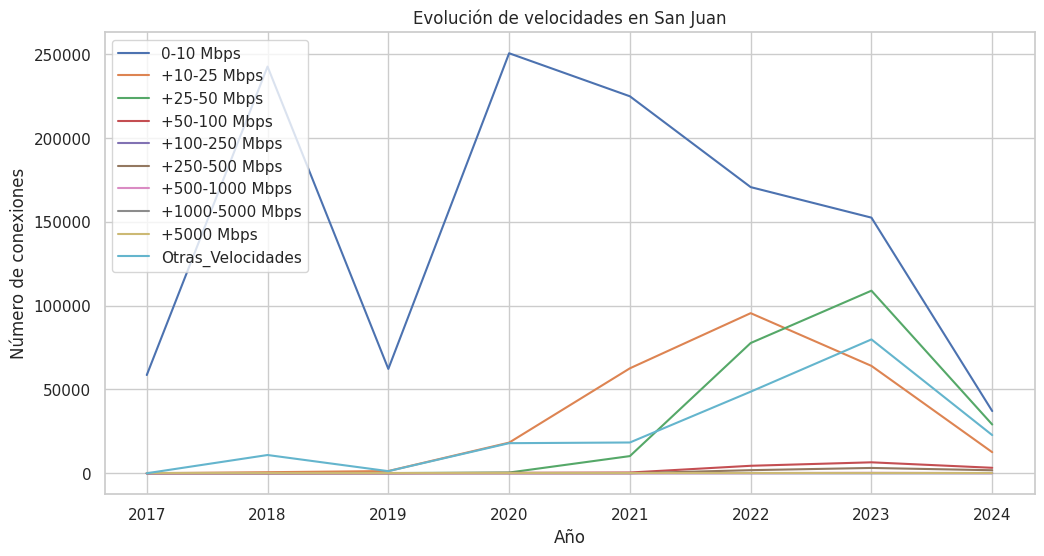

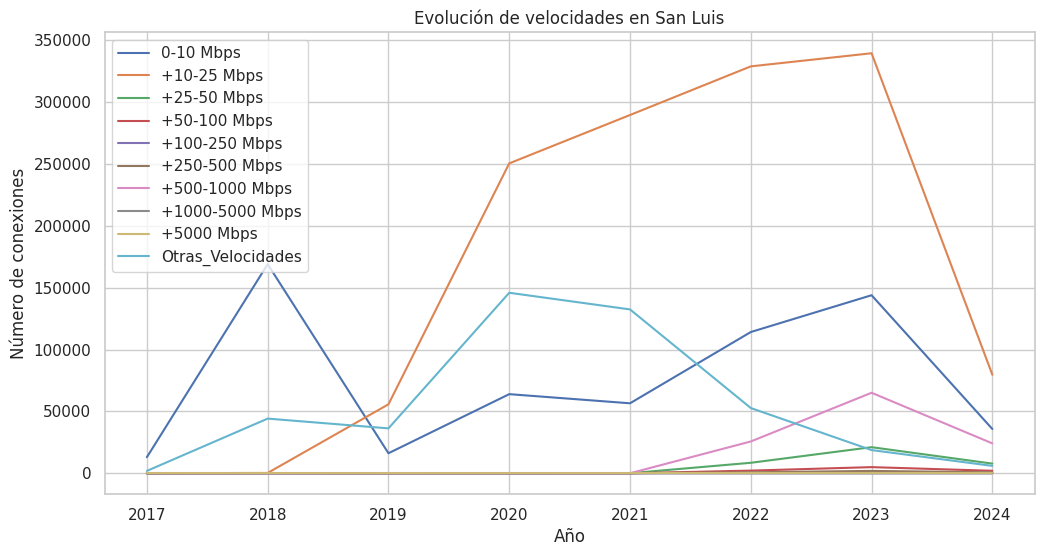

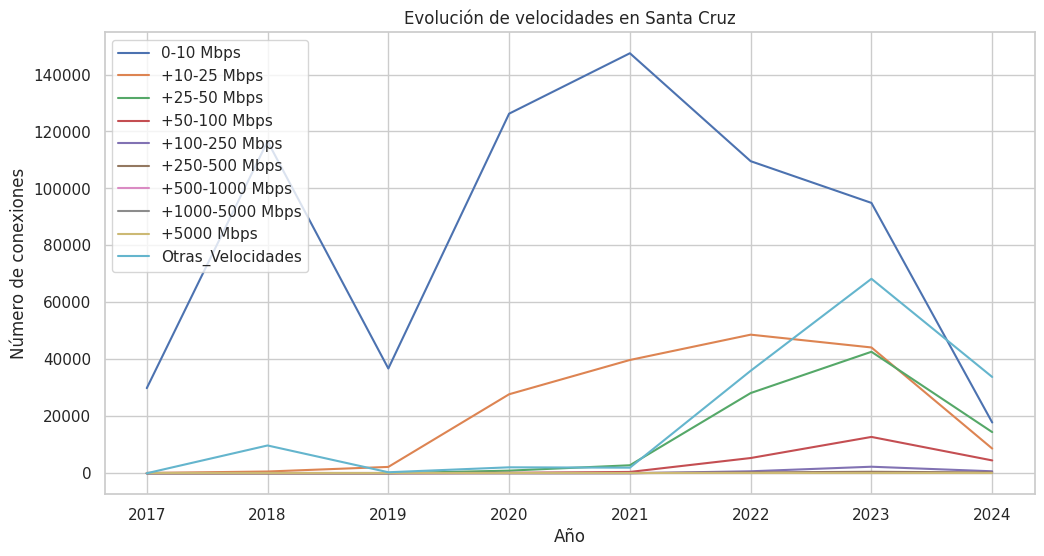

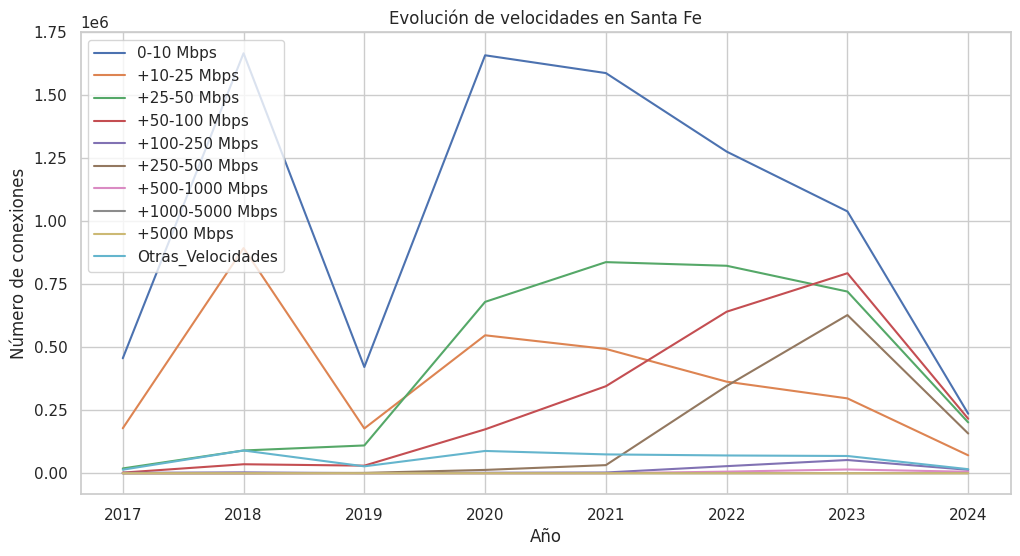

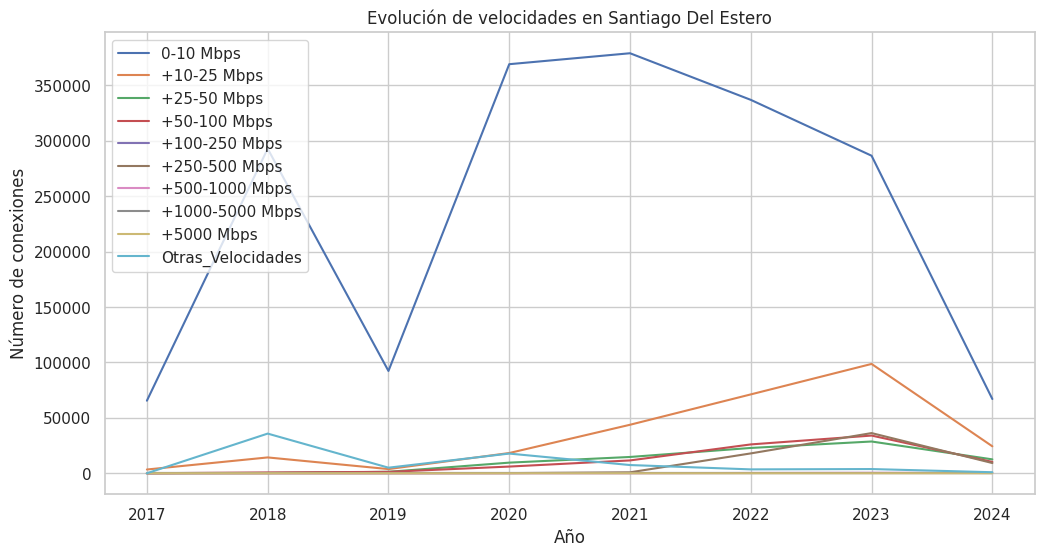

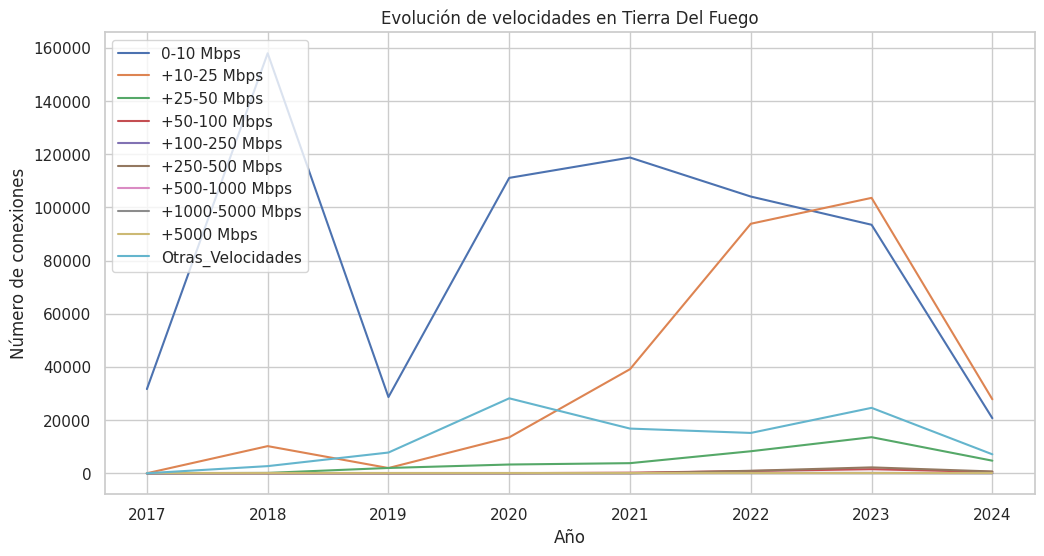

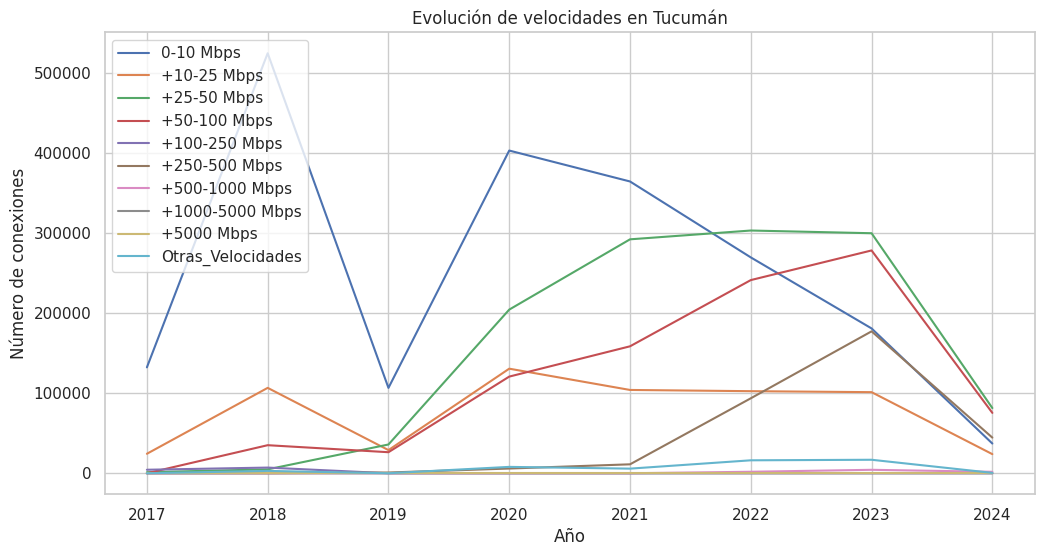

In [153]:
# Calcular los porcentajes para cada rango de velocidad
for col in velocidad_cols:
    df_grouped[col+'_pct'] = df_grouped[col] / df_grouped[velocidad_cols].sum(axis=1)

# Crear el gráfico de líneas para cada provincia
for provincia in df_grouped['Provincia'].unique():
    data = df_grouped[df_grouped['Provincia'] == provincia]
    plt.figure(figsize=(12, 6))

    # Graficar cada rango de velocidad como una línea separada
    for col in velocidad_cols:
        plt.plot(data['Año'], data[col], label=col)

    plt.title(f'Evolución de velocidades en {provincia}')
    plt.legend(loc='upper left')
    plt.xlabel('Año')
    plt.ylabel('Número de conexiones')
    plt.show()

> Analisis de las conexiones a lo largo del tiempo

### Evolucion en el tiempo de la cantidad de accesos segun velocidad

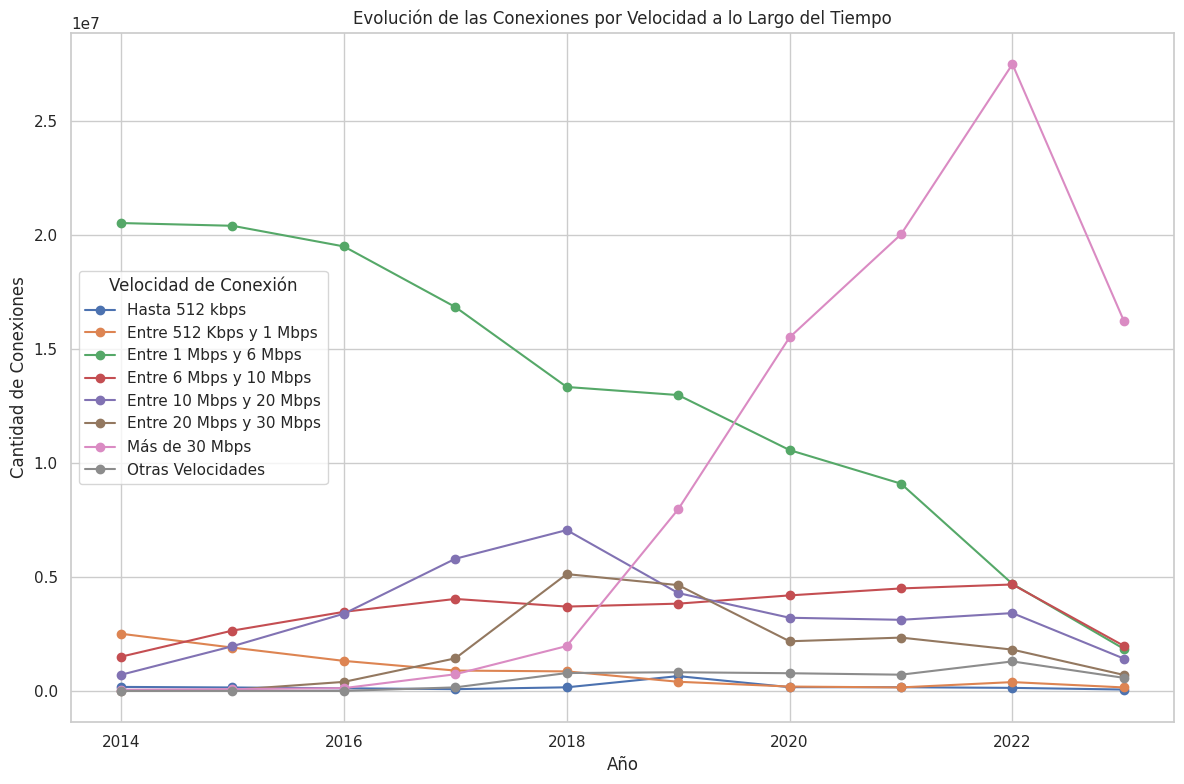

In [154]:
# Agrupar por año y sumar las cantidades
df_agrupado = df_filtradoB.groupby('Año').sum().reset_index()

# Configurar el estilo de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))

# Iterar sobre cada columna de velocidad (excepto 'Año')
for column in df_agrupado.columns[12:20]:
    plt.plot(df_agrupado['Año'], df_agrupado[column], marker='o', label=column)

# Añadir título y etiquetas
plt.title('Evolución de las Conexiones por Velocidad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')
plt.legend(title='Velocidad de Conexión')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## **Correlacion**

La correlación entre variables numericas puede ser positiva, es decir cuando una aumenta su valor la variable correlacionada aumenta su valor también en una proporción, si la correlación es negativa, cuando una variable aumenta la otra disminuye en una proporción y vice versa.

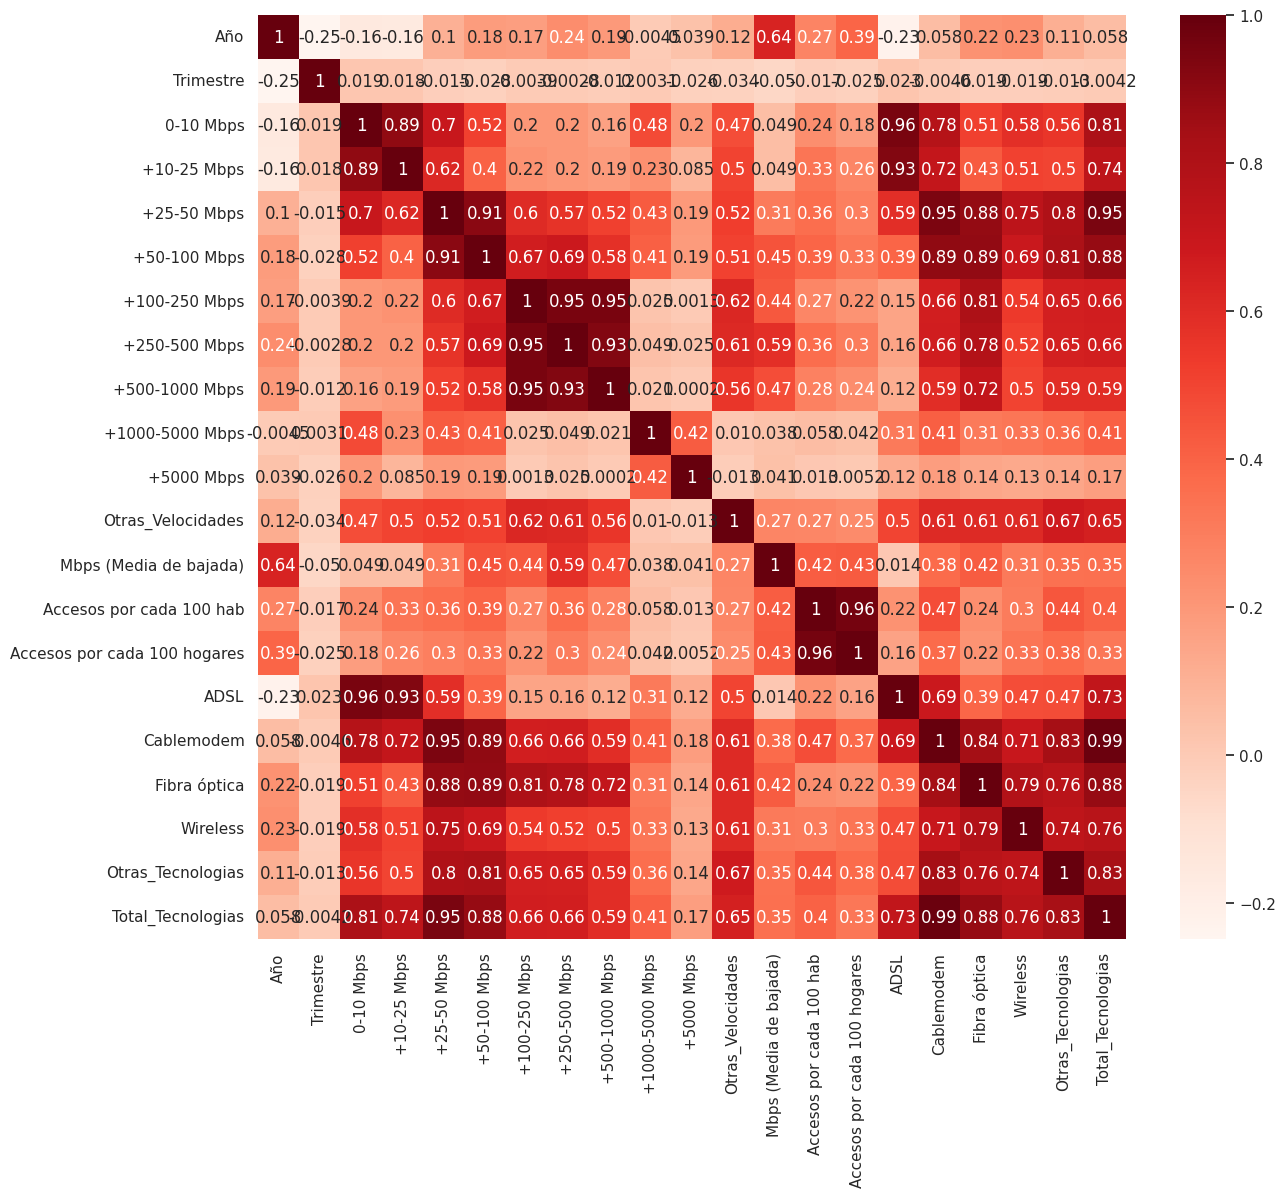

In [135]:
plt.figure(figsize=(14,12))

# Seleccionamos solo las columnas numéricas para el cálculo de la correlación
cor = df.select_dtypes(include=['number']).corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<ipython-input-136-d924a8b64f1c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Tecnologias', y='Provincia', data=df_provincia_total, palette='viridis')


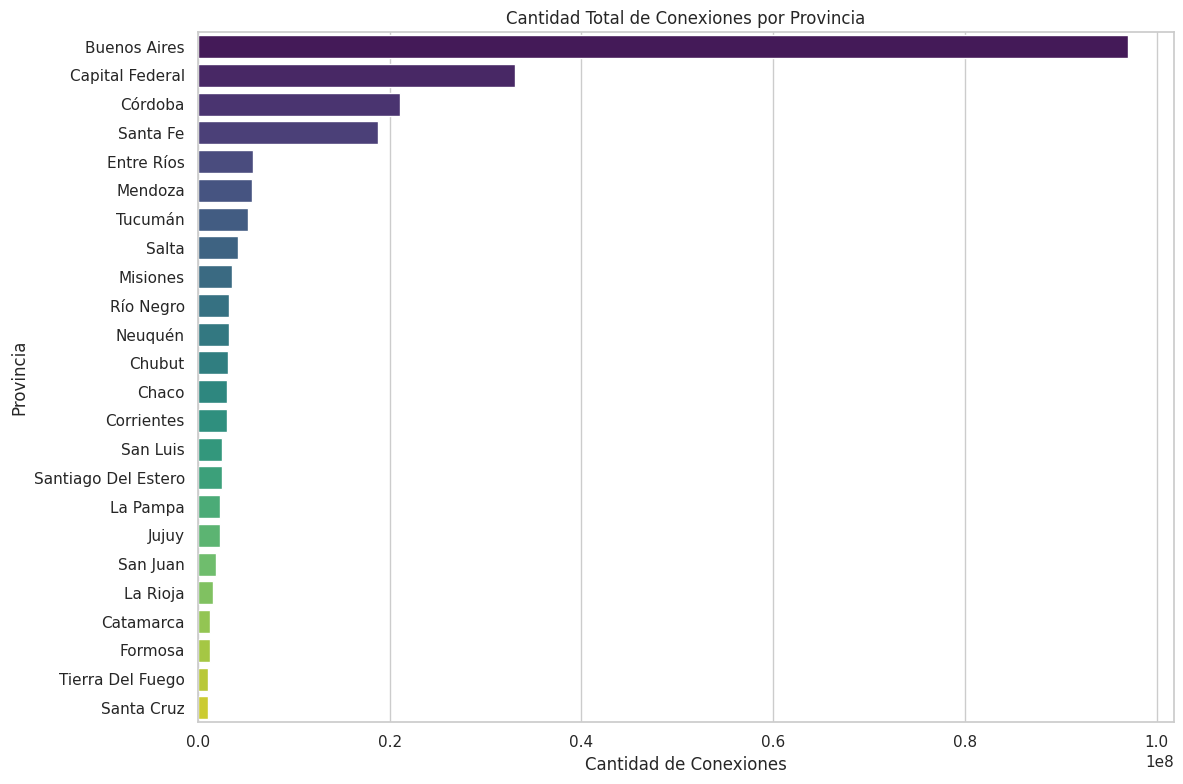

In [136]:
# Agrupar por provincia y sumar las conexiones
df_provincia_total = df.groupby('Provincia')['Total_Tecnologias'].sum().reset_index()

# Ordenar el DataFrame por la cantidad total de conexiones en orden descendente
df_provincia_total = df_provincia_total.sort_values(by='Total_Tecnologias', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x='Total_Tecnologias', y='Provincia', data=df_provincia_total, palette='viridis')

# Añadir título y etiquetas
plt.title('Cantidad Total de Conexiones por Provincia')
plt.xlabel('Cantidad de Conexiones')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> Si bien este grafico nos muestra una desigualdad muy importante entre las conexiones de Buenos Aires y el resto de las provincias, es muy importante tener en cuenta tambien que es la provincia con mas habitantes del pais; por lo que vamos a evaluar esta cantidad de conexiones en relacion a la poblacion de cada provincia.

In [137]:
# DataFrame de población (ejemplo)
df_poblacion = pd.DataFrame({
    'Provincia': ['Buenos Aires','Capital Federal','Córdoba','Santa Fe','Entre Ríos','Corrientes','Mendoza','Tucumán','Salta','Misiones','Río Negro','Neuquén','Chubut','Chaco','San Luis','Santiago Del Estero','La Pampa','Jujuy','San Juan','La Rioja','Catamarca','Formosa','Tierra Del Fuego','Santa Cruz'],
    'Poblacion': [17523996,3121707,3840905,3544908,1425578,1212696,2043540,1731820,1441351,1278873,750768,710814,592621,1129606,542069,1060906,361859,811611,822853,383865,429562,607419,185732,337226]
})

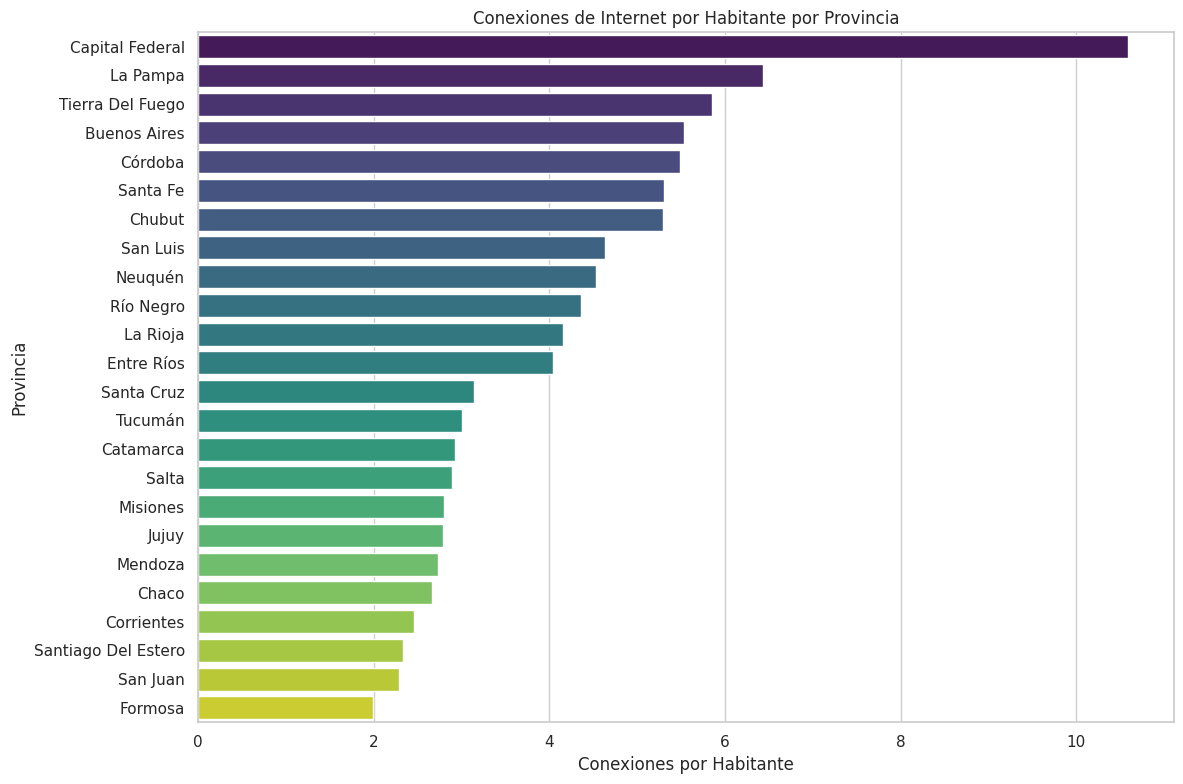

In [138]:
# Unir los DataFrames de conexiones y población por la columna 'provincia'
df_completo = pd.merge(df_provincia_total, df_poblacion, on='Provincia')

# Calcular conexiones per cápita: Dividir la cantidad total de conexiones por la población de cada provincia
# para obtener el número de conexiones por habitante.
df_completo['conexiones_per_capita'] = df_completo['Total_Tecnologias'] / df_completo['Poblacion']

# Ordenar el DataFrame por conexiones per cápita
df_completo = df_completo.sort_values(by='conexiones_per_capita', ascending=False)

# Configurar el estilo de seaborn para gráficos más atractivos
#sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras de conexiones per cápita
sns.barplot(x='conexiones_per_capita', y='Provincia', hue='Provincia', data=df_completo, palette='viridis')

# Añadir título y etiquetas
plt.title('Conexiones de Internet por Habitante por Provincia')
plt.xlabel('Conexiones por Habitante')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Visualizar la Penetración de Internet en Argentina

In [139]:
df_totales_agrupado = df_totales.groupby(['Año']).agg({
    'Accesos por cada 100 hab': 'mean',
    'Accesos por cada 100 hogares': 'mean'
}).reset_index()

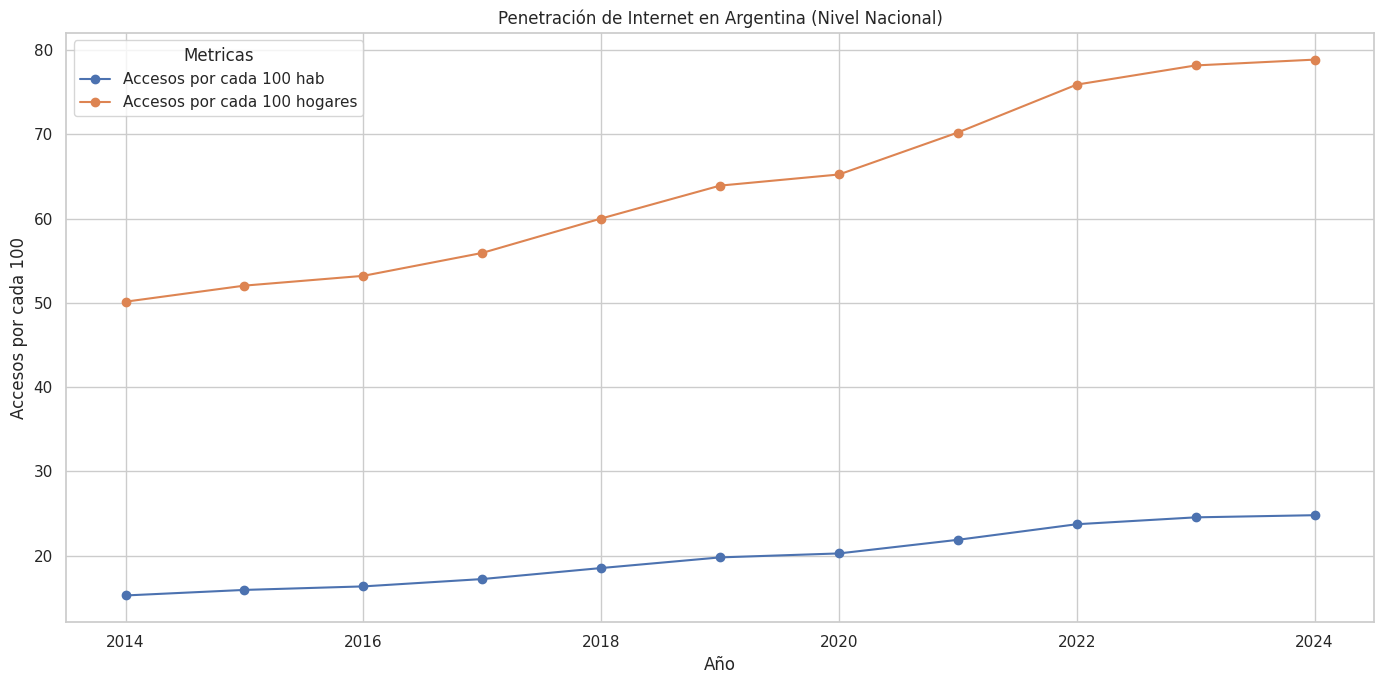

In [140]:
# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))

# Graficar accesos por cada 100 habitantes
plt.plot(df_totales_agrupado['Año'], df_totales_agrupado['Accesos por cada 100 hab'], marker='o', label='Accesos por cada 100 hab')

# Graficar accesos por cada 100 hogares
plt.plot(df_totales_agrupado['Año'], df_totales_agrupado['Accesos por cada 100 hogares'], marker='o', label='Accesos por cada 100 hogares')

# Añadir título y etiquetas
plt.title('Penetración de Internet en Argentina (Nivel Nacional)')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.legend(title='Metricas')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Visualizar la Penetración de Internet en cada provincia de Argentina

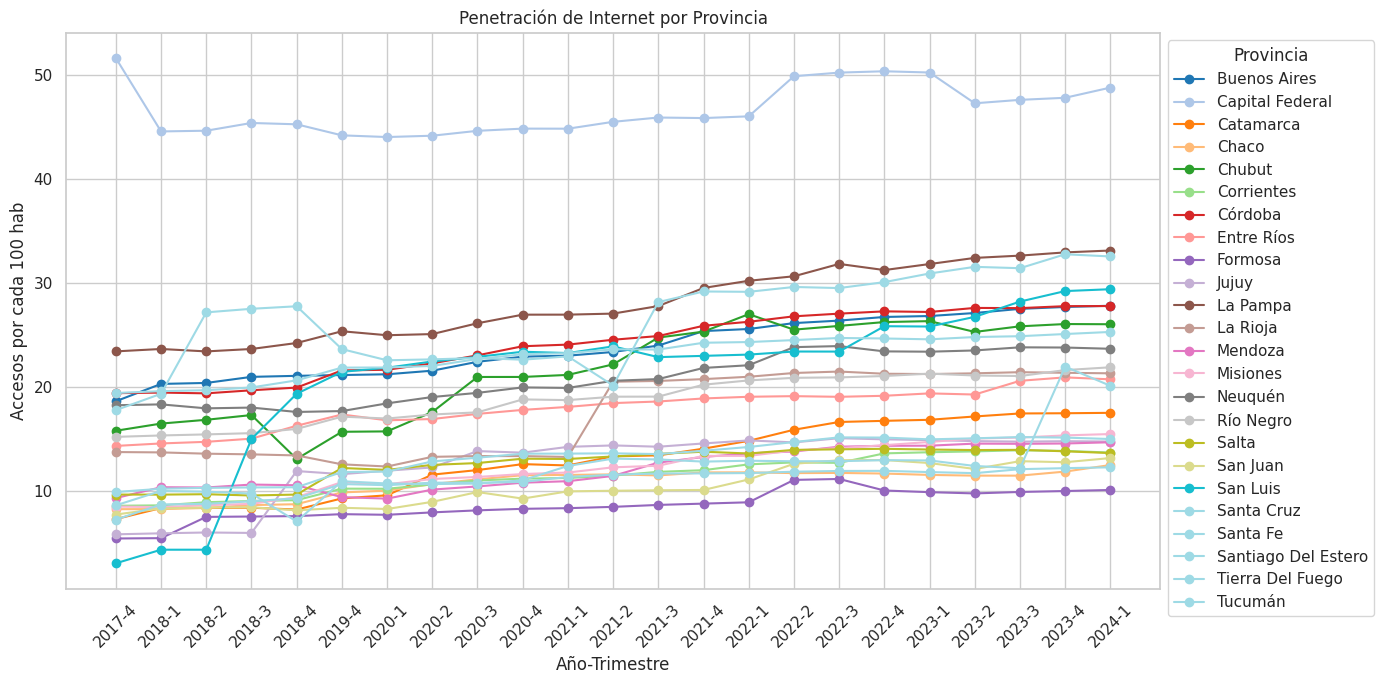

In [141]:
# Agrupar por Año, Trimestre y Provincia y calcular la media
df_agrupadoPI = df.groupby(['Año', 'Trimestre', 'Provincia']).agg({
    'Accesos por cada 100 hab': 'mean',
    'Accesos por cada 100 hogares': 'mean'
}).reset_index()

# Crear el gráfico de líneas para cada provincia
plt.figure(figsize=(14, 7))

# Importar la librería necesaria para paletas de colores
#import matplotlib.cm as cm

# Crear un mapa de colores
colormap = plt.colormaps['tab20']

# Graficar accesos por cada 100 habitantes para cada provincia
for i, provincia in enumerate(df_agrupadoPI['Provincia'].unique()):
    df_provincia = df_agrupadoPI[df_agrupadoPI['Provincia'] == provincia]
    # Convertir 'Año' y 'Trimestre' a tipo cadena antes de la concatenación
    plt.plot(df_provincia['Año'].astype(str) + '-' + df_provincia['Trimestre'].astype(str),
             df_provincia['Accesos por cada 100 hab'], marker='o', label=provincia, color=colormap(i))

plt.title('Penetración de Internet por Provincia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Evolucion anual de los ingresos del sector (en miles de pesos)

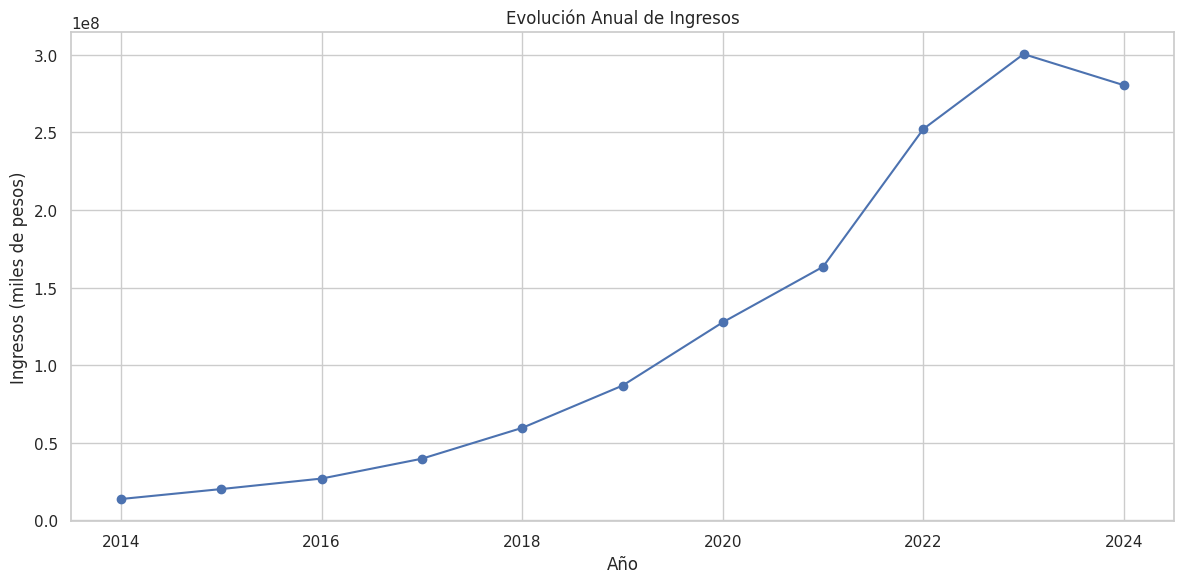

In [143]:
# Agrupar por Año y sumar los ingresos trimestrales
df_anual = df_totales.groupby('Año').agg({
    'Ingresos (miles de pesos)': 'sum'
}).reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los ingresos anuales
plt.plot(df_anual['Año'], df_anual['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Evolución Anual de Ingresos')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Evolucion trimestral de los ingresos del sector (en miles de pesos)

In [148]:
# Crear una columna combinada para Año y Trimestre
df_totales['Año-Trimestre'] = df_totales['Año'].astype(str) + '-' + df_totales['Trimestre'].astype(str)

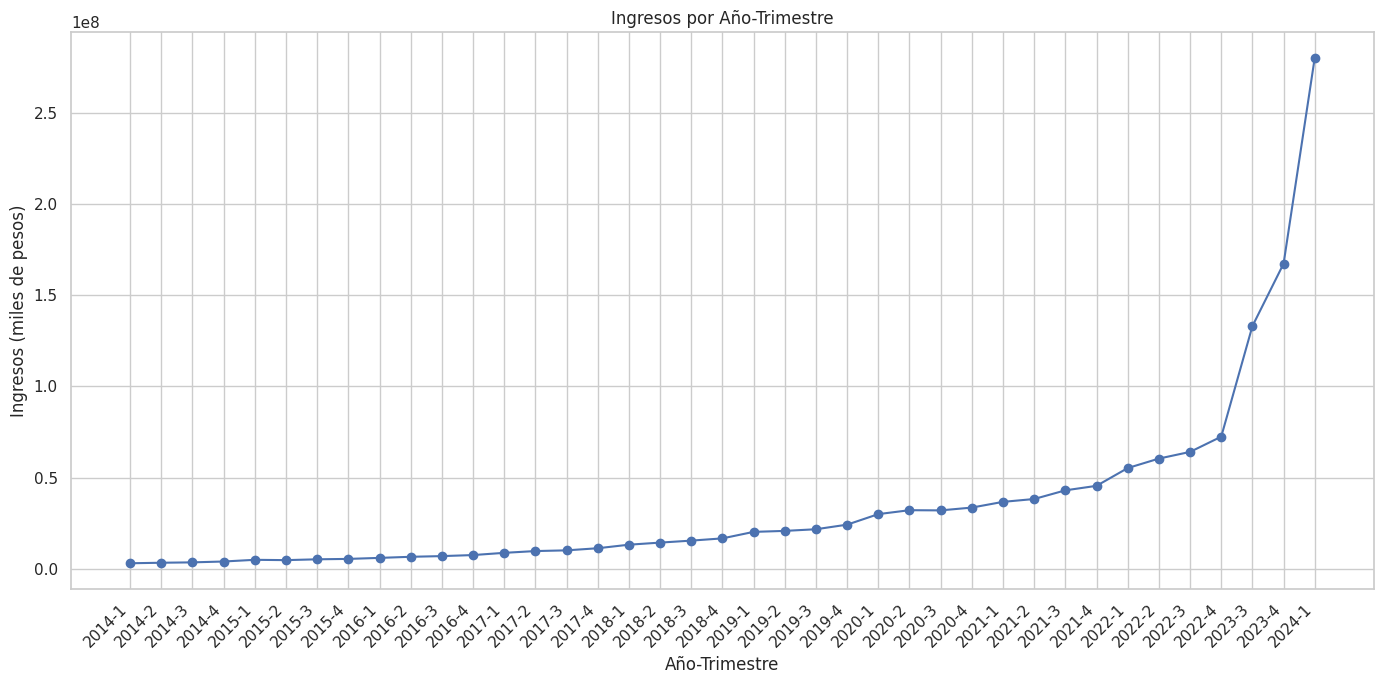

In [150]:
# Ordenar el DataFrame por Año-Trimestre para asegurar que las líneas se dibujen en el orden correcto
df_totales = df_totales.sort_values('Año-Trimestre')

# Crear el gráfico
plt.figure(figsize=(14, 7))

# Graficar los ingresos
plt.plot(df_totales['Año-Trimestre'], df_totales['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Ingresos por Año-Trimestre')
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de pesos)')

# Ajustar etiquetas del eje x para evitar superposición
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas y alinéelas a la derecha

plt.grid(True)
plt.tight_layout()
plt.show()

## Analisis de las tecnologias utilizadas para la conexion a Internet

### Porcentaje de cada tecnologia utilizada en el pais

In [156]:
# Sumar los accesos por cada tecnología
totales_tecnologias = df_localidades[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA',
                                      'SATELITAL', 'WIMAX', 'WIRELESS', 'Otras_Tecnologias']].sum()

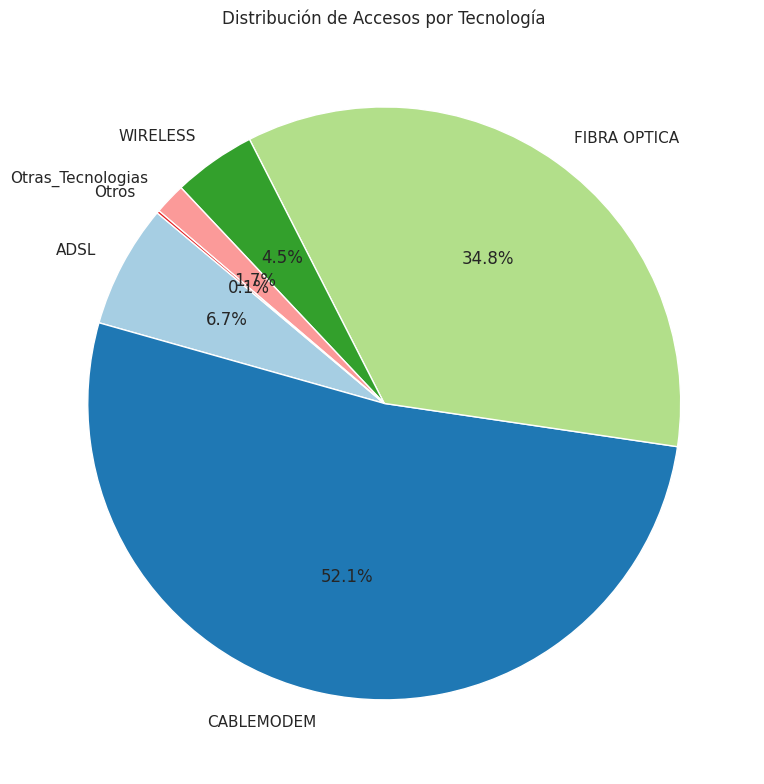

In [160]:
# Definir un umbral para agrupar tecnologías con porcentajes muy bajos
umbral = 0.01  # Porcentaje mínimo para considerar cada tecnología

# Calcular el porcentaje de cada tecnología
porcentajes = totales_tecnologias / totales_tecnologias.sum()

# Agrupar tecnologías pequeñas en una categoría "Otros"
tecnologias_principales = porcentajes[porcentajes > umbral].index
otros_total = totales_tecnologias[~totales_tecnologias.index.isin(tecnologias_principales)].sum()

# Crear una nueva serie con la categoría "Otros"
otros_serie = pd.Series({'Otros': otros_total})

# Concatenar las series en lugar de usar append
totales_agrupados = pd.concat([totales_tecnologias[tecnologias_principales], otros_serie])
porcentajes_agrupados = totales_agrupados / totales_agrupados.sum()

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(porcentajes_agrupados, labels=porcentajes_agrupados.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(porcentajes_agrupados))), startangle=140)
plt.title('Distribución de Accesos por Tecnología')
plt.tight_layout()
plt.show()

### Utilizacion de cada tecnologia en las diferentes provincias

In [162]:
# Agrupar por Provincia y sumar las cantidades de conexiones para cada tecnología
totales_por_provincia = df_localidades.groupby('Provincia').agg({
    'ADSL': 'sum',
    'CABLEMODEM': 'sum',
    'DIAL UP': 'sum',
    'FIBRA OPTICA': 'sum',
    'SATELITAL': 'sum',
    'WIMAX': 'sum',
    'WIRELESS': 'sum',
    'Otras_Tecnologias': 'sum'
}).reset_index()

<Figure size 1400x800 with 0 Axes>

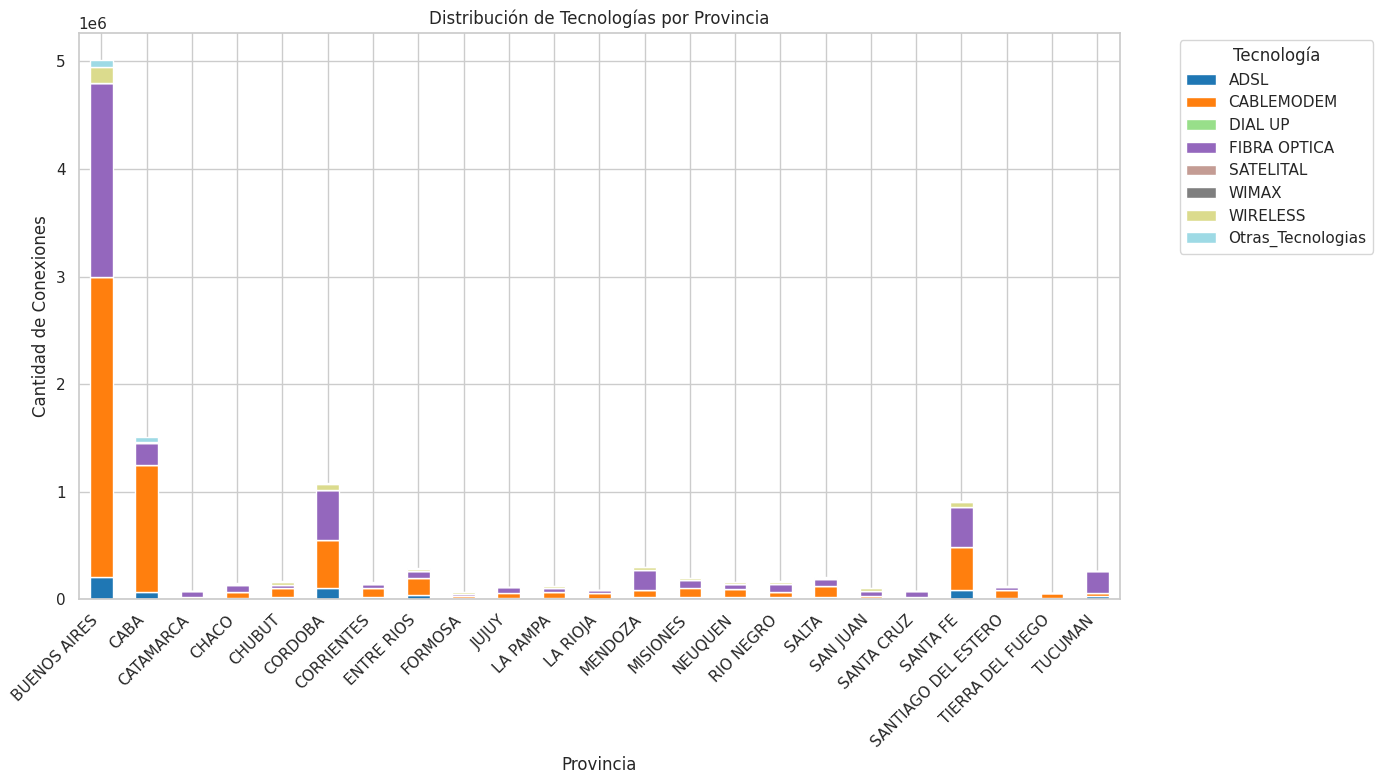

In [163]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar las barras apiladas
totales_por_provincia.set_index('Provincia').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Añadir título y etiquetas
plt.title('Distribución de Tecnologías por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas para mejor visibilidad

plt.tight_layout()
plt.show()

### Evolucion en el tiempo

In [164]:
conexiones_por_periodo = df_totales.groupby('Año-Trimestre').agg({
    'ADSL': 'sum',
    'Cablemodem': 'sum',
    'Fibra óptica': 'sum',
    'Wireless': 'sum',
    'Otros': 'sum'
}).reset_index()

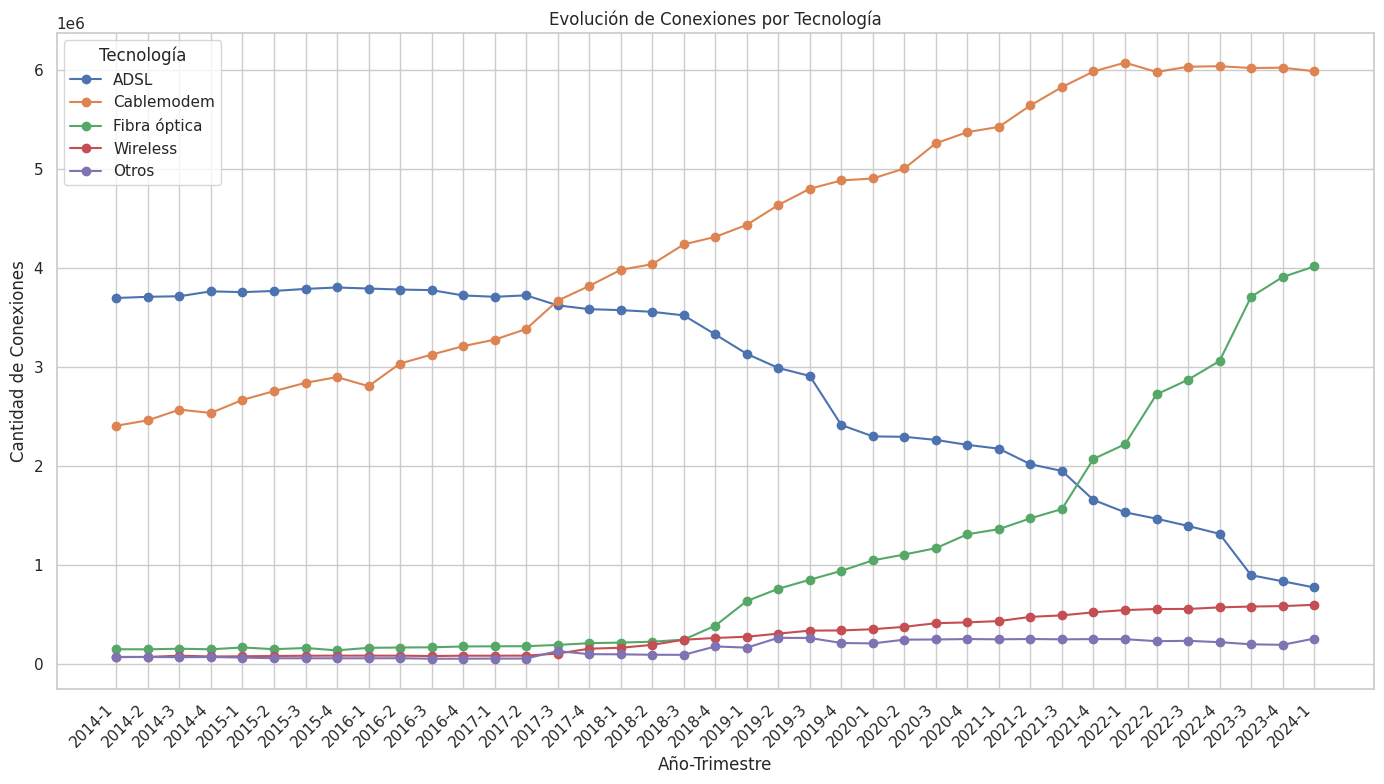

In [166]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar la evolución para cada tecnología
for tecnologia in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    plt.plot(conexiones_por_periodo['Año-Trimestre'], conexiones_por_periodo[tecnologia], marker='o', linestyle='-', label=tecnologia)

# Añadir título y etiquetas
plt.title('Evolución de Conexiones por Tecnología')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de Conexiones')
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas para mejorar la visibilidad
plt.legend(title='Tecnología')
plt.grid(True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

> El ADSL es una tecnologia que ha decaido y mantiene un descenso marcado a lo largo del tiempo. La tecnologia que esta en auge es la fibra optica y el cablemodem se mantiene relativamente estable desde el ultimo trimestre del 2021.
Por otro lado, si bien no hay muchas conexiones que utilizen wireless, en los ultimos años viene creciendo.